In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/clean_game_data.csv', index_col=0)

In [3]:
# printing the column names

print(df.columns)

Index(['Side', 'Region', 'Year', 'Game ID', 'Team', 'Victory', 'Game Duration',
       'Player', 'Role', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       'CS in Team's Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM',
       'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion',
       'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%',
       'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills',
       'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Damage dealt to turrets', 'Total heal', 'Time ccing others',
       'Total damage taken'],
      dtype='object')


## Analyse descriptive

In [4]:
# EDA, Analyse descriptives

df.describe()

,Year,Game ID,Game Duration,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CSM,...,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Damage dealt to turrets,Total heal,Time ccing others,Total damage taken
count,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,...,65840.000000,65840.000000,65840.00000,65840.000000,65840.000000,65840.00000,65840.000000,65840.000000,65840.000000,65840.000000
mean,2021.510024,36428.523694,32.719491,2.493211,2.498967,5.790340,5.048887,213.546598,34.873663,6.538322,...,0.006334,0.001747,0.00000,0.000000,0.000000,0.00000,2752.477840,5968.694411,17.641282,18536.930058
std,1.089791,9540.604536,5.788765,2.450838,1.804162,4.109824,4.724587,111.951057,49.950538,3.189439,...,0.080849,0.041757,894.93387,17.009472,704.424984,0.75687,3359.463808,5739.623482,14.278177,9085.180362
min,2020.000000,20708.000000,16.833000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5208.00000,-125.000000,-4195.000000,-4.00000,0.000000,0.000000,0.000000,445.000000
25%,2021.000000,28329.000000,28.617000,1.000000,1.000000,3.000000,1.300000,152.000000,1.000000,4.900000,...,0.000000,0.000000,-506.00000,-10.000000,-438.000000,0.00000,286.000000,1802.000000,9.000000,11744.000000
50%,2021.000000,35390.500000,32.017000,2.000000,2.000000,5.000000,3.300000,231.000000,12.000000,7.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1496.000000,3998.000000,15.000000,16759.500000
75%,2022.000000,44368.250000,36.033000,4.000000,4.000000,8.000000,8.000000,291.000000,37.000000,9.000000,...,0.000000,0.000000,506.00000,10.000000,438.000000,0.00000,4123.000000,8557.000000,23.000000,23768.000000
max,2023.000000,53624.000000,70.267000,19.000000,12.000000,32.000000,27.000000,645.000000,291.000000,13.200000,...,2.000000,1.000000,5208.00000,125.000000,4195.000000,4.00000,61490.000000,64434.000000,288.000000,76316.000000


In [5]:
pd.unique(df['Role'])

array(['TOP', 'JUNGLE', 'MID', 'ADC', 'SUPPORT'], dtype=object)

In [6]:
pd.crosstab(df['Team'], 'count')

col_0,count
Team,
100 Thieves,2090
Afreeca Freecs,955
Astralis,1065
BRION,445
Beyond Gaming,140
...,...
Top Esports,165
Unicorns Of Love,265
V3 Esports,50


In [7]:
cleandf = df.select_dtypes(include='number').drop(columns=['Year', 'Game ID'])

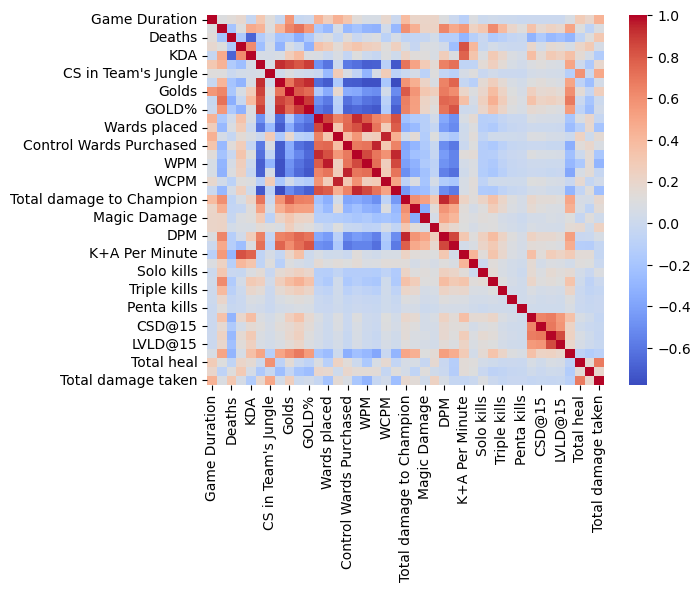

In [8]:
import analyze_tools

# Analyse de la corrélation entre les variables
analyze_tools.corr_heatmap(cleandf)

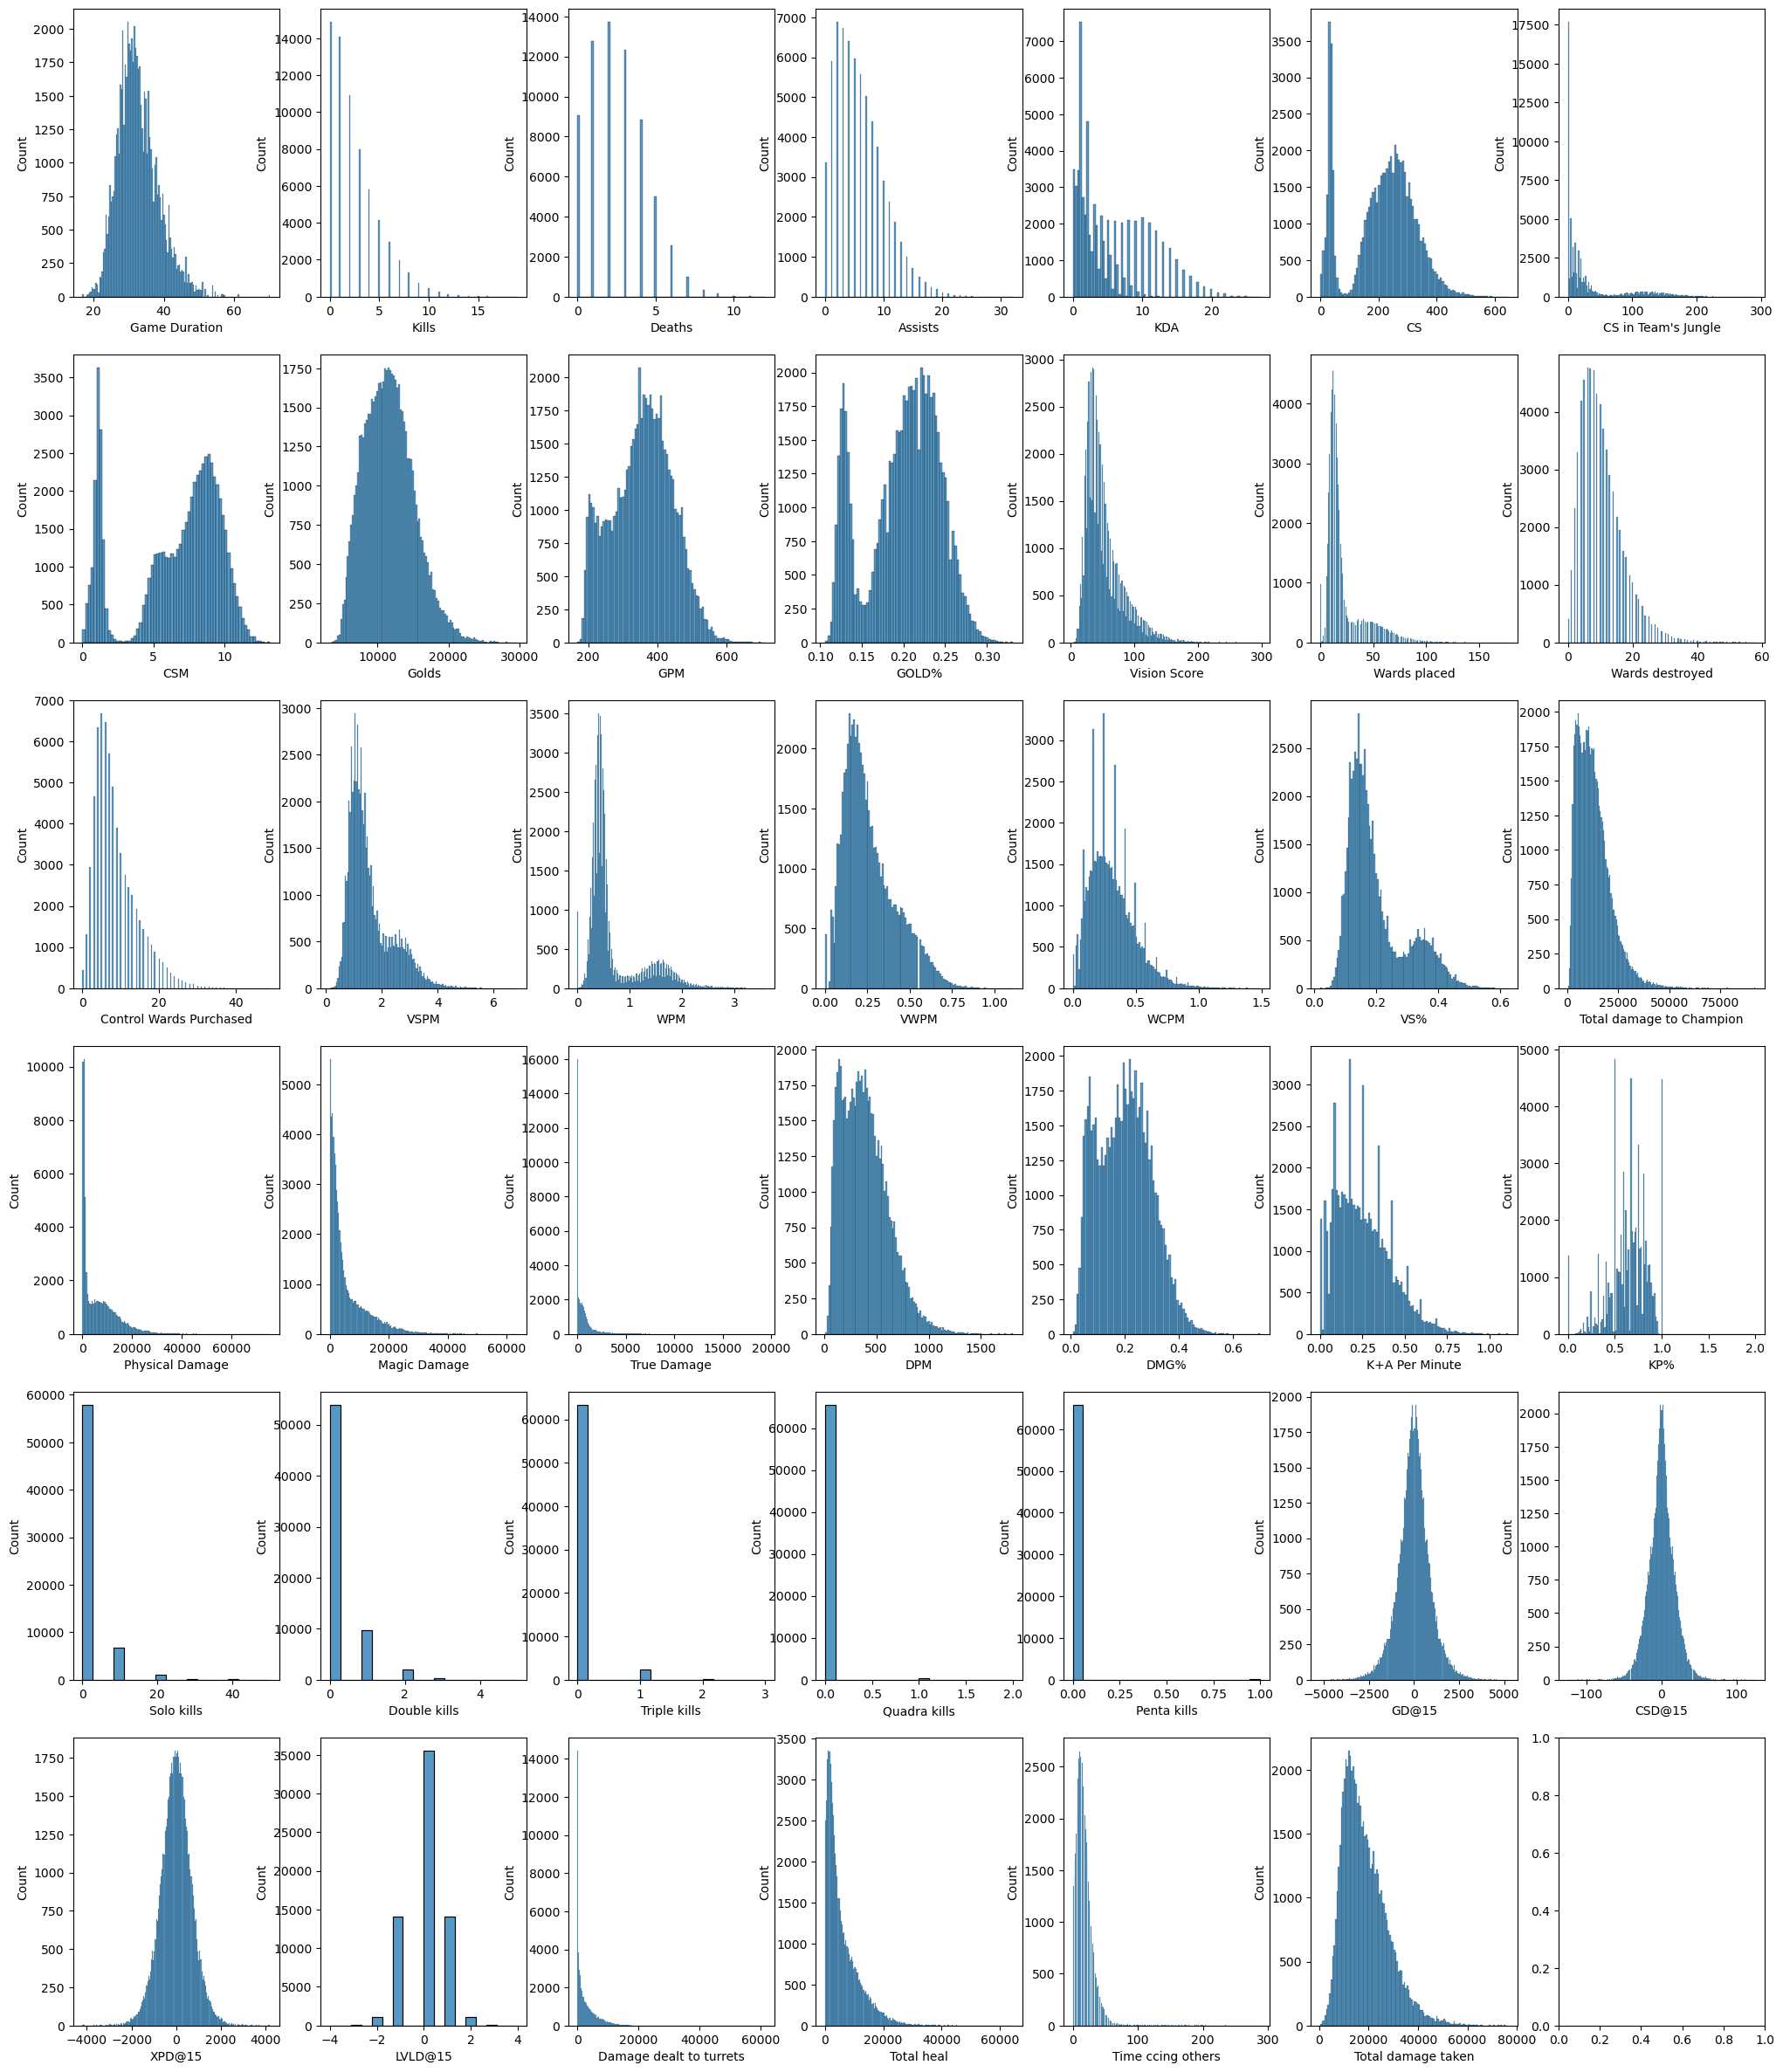

In [9]:
# Analyse de la distribution des variables

# Distribution des variables

figsize=(25, 30)
fig, axes = plt.subplots(6, 7, figsize=figsize)

i = 0
j = 0
for col in cleandf.columns:
    if j != 0 and j % 7 == 0:
        i += 1
        j = 0
    sns.histplot(cleandf[col], ax=axes[i, j])
    j += 1

plt.show()

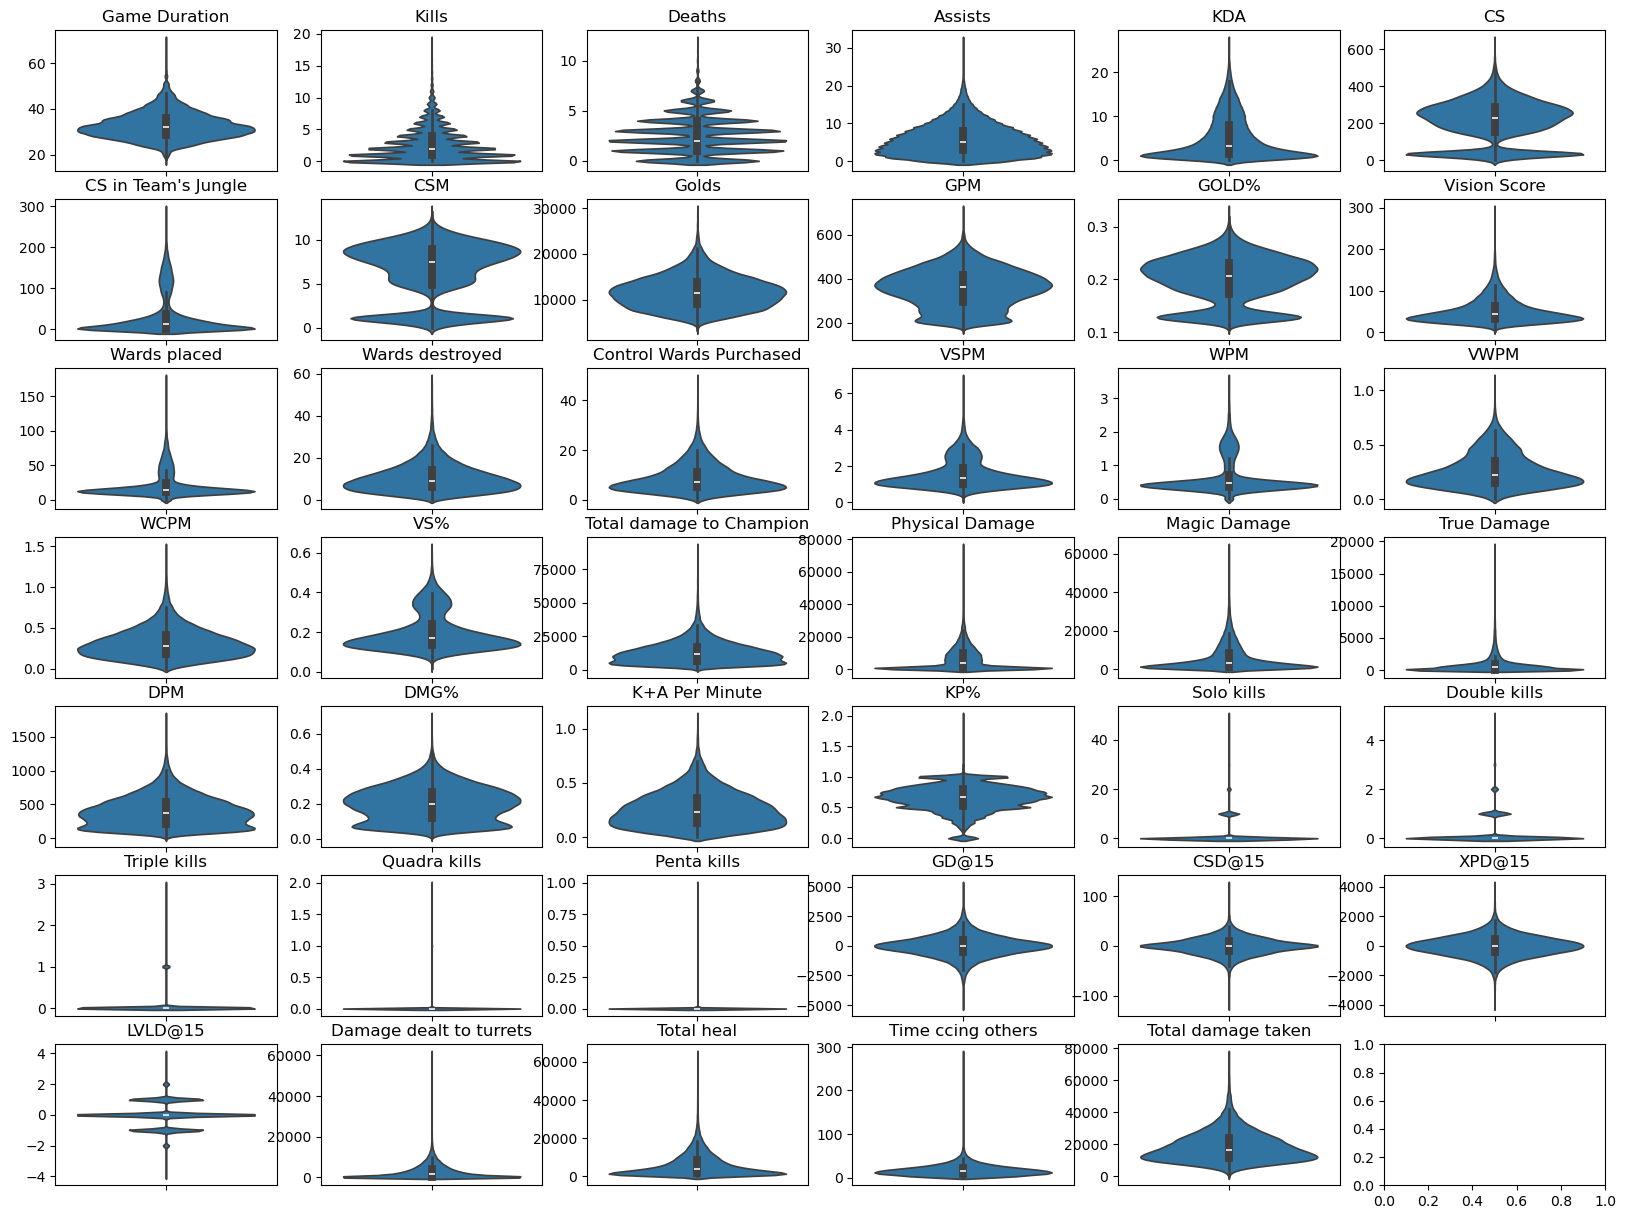

In [10]:
cleandf = cleandf.reset_index(drop=True)
analyze_tools.raw_violinplot(cleandf, 7, 6)

### Analyse Univariée

Certaines variables semble avoir une distribution symétrique tel que : CSD@15, GD@15, XPD@15.
C'est dû au fait que ce sont des statistiques qui sont inversement corréllé avec l'adversaire : par exemple CSD@15 veut dire le differentiel de CS à 15 minutes par rapport à l'adversaire du même role. Avoir 15 CSD@15 veut dire que l'adversaire a -15.

Au niveau de la colonne CS, on remarque qu'il y a semblablement deux distributions. On suppose que ce sont les support dans le jeu qui ne collecte pas beaucoup de CS pour les donner à ses coéquipiers qui ont besoin de plus de gold.

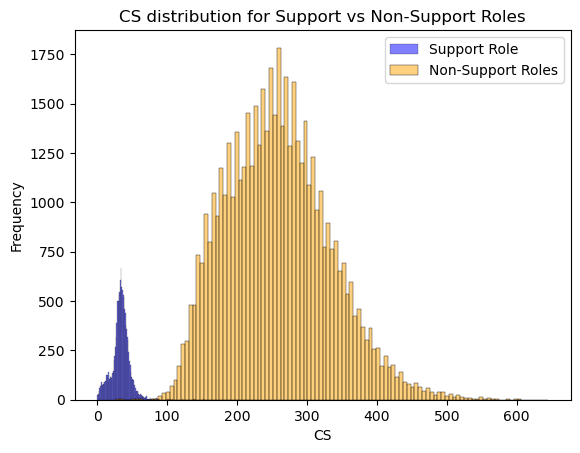

In [11]:
supportdf = df[df['Role'] == 'SUPPORT']
notsupportdf = df[df['Role'] != 'SUPPORT']

# Plotting CS distribution for support role
sns.histplot(supportdf['CS'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['CS'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('CS')
plt.ylabel('Frequency')
plt.title('CS distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()


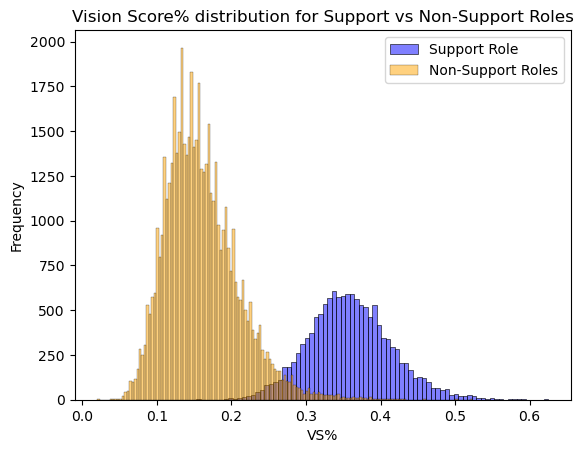

In [12]:
# Comparing VS% distribution for support and non-support roles

sns.histplot(supportdf['VS%'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['VS%'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('VS%')
plt.ylabel('Frequency')
plt.title('Vision Score% distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

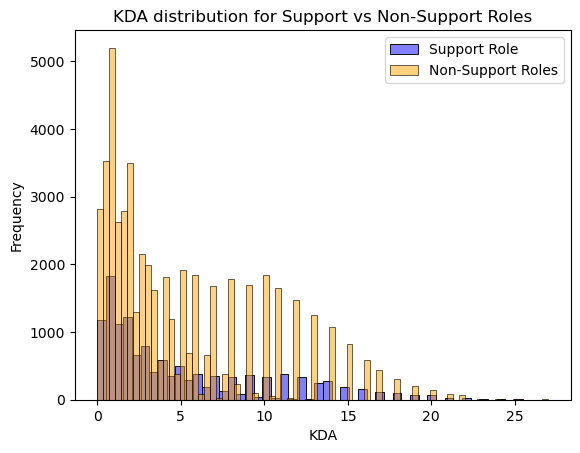

In [39]:
# Comparing KDA distribution for support and non-support roles, normalized to percentage of population

sns.histplot(supportdf['KDA'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['KDA'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('KDA')
plt.ylabel('Frequency')
plt.title('KDA distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

In [14]:
roledf = df[df['Role'] == 'SUPPORT'].select_dtypes(include='number').drop(columns=['Year', 'Game ID'])


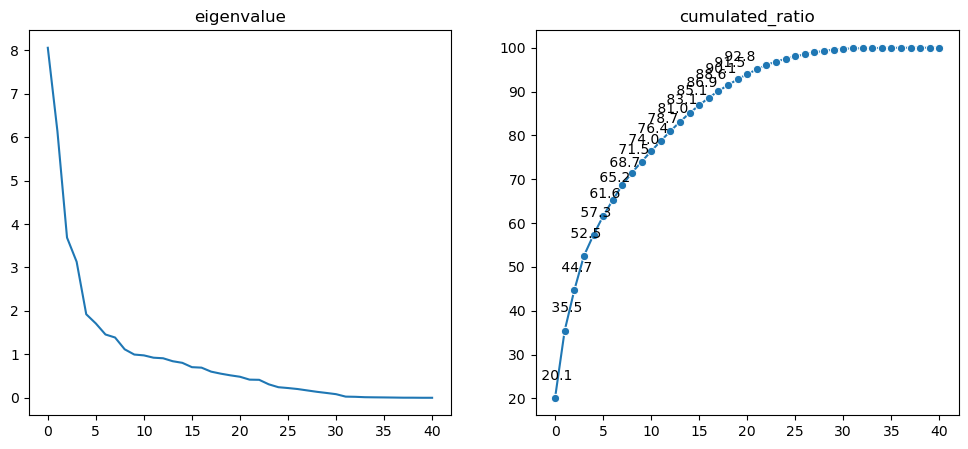

In [15]:
analyze_tools.pca_analyze(roledf.dropna(axis=1))

## Analyse Bi-Variée

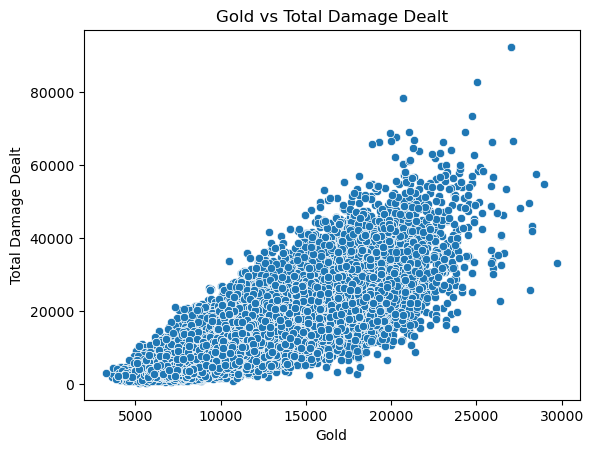

In [16]:
# Scatterplot du nombre de gold par rapport au degats infligés

sns.scatterplot(x='Golds', y='Total damage to Champion', data=df)
plt.xlabel('Gold')
plt.ylabel('Total Damage Dealt')
plt.title('Gold vs Total Damage Dealt')
plt.show()

In [17]:
# Verifications de l'influence du KDA sur le resultat de la partie pour un role en particulier

# Top

topdf = df[df['Role'] == 'TOP']



#### Interprétation :

Avoir plus de gold permet d'infliger potentiellement plus de dégats grâce au gold qui permettent d'acheter des items qui aide à augmenter les dégats.

Néanmoins, cela de garantie pas que le joueur infligera bien ces dégats potentiels, d'où l'apparition de variance des dégats qui augmente plus le gold est important.

In [18]:
# Verification de la correlation entre le nombre de gold et les degats infligés avec le coefficient de correlation de Pearson

print(df['Golds'].corr(df['Total damage to Champion']))

0.794715571376296


On a 0.79 de correlation entre le nombre de gold et les degats infligés, ce qui est assez élevé et montre une certaine influence entre les deux variables.

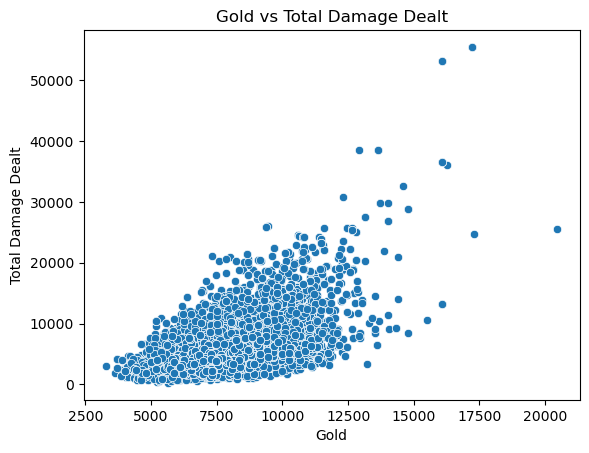

In [19]:
sns.scatterplot(x='Golds', y='Total damage to Champion', data=df[df['Role']=='SUPPORT'])
plt.xlabel('Gold')
plt.ylabel('Total Damage Dealt')
plt.title('Gold vs Total Damage Dealt')
plt.show()

In [20]:
print(df[df['Role']=='SUPPORT']['Golds'].corr(df[df['Role']=='SUPPORT']['Total damage to Champion']))

0.5436581547557185


C'est moins le cas pour les supports qui sont de manière intrinsèque moins incliné à infliger des dégâts mais plus à des tâches plus supportives comme "l'engage" ou bien le "heal".

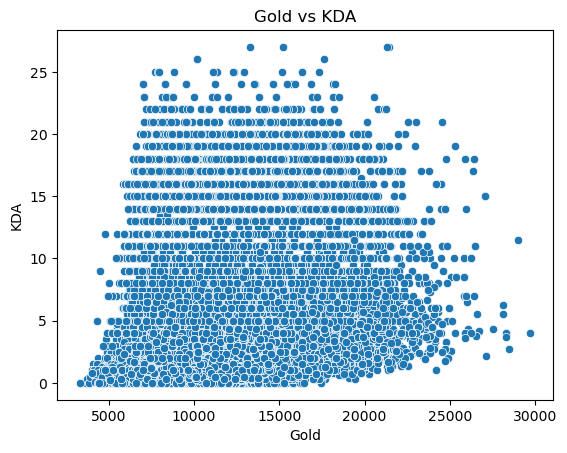

In [21]:
sns.scatterplot(x='Golds', y='KDA', data=df)
plt.xlabel('Gold')
plt.ylabel('KDA')
plt.title('Gold vs KDA')
plt.show()

In [22]:
print(df['Golds'].corr(df['KDA']))

0.2763605055651021


Là les golds n'influent pas tellement sur le KDA, le nombre de Gold détenu peut être un indicateur de puissance à la fin du jeu mais ne peut pas représenter l'efficacité d'un joueur d'où la faible corrélation.

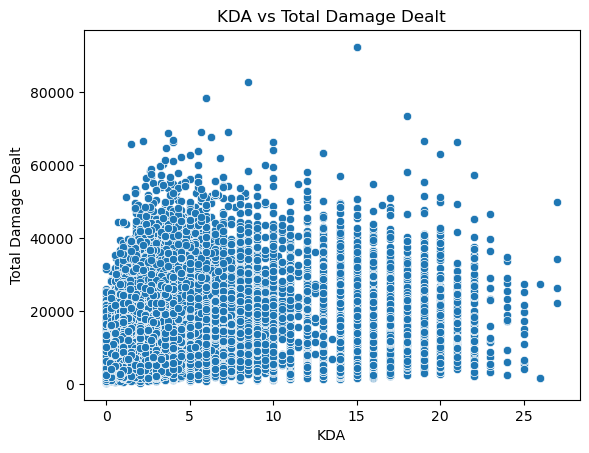

In [23]:
# KDA vs Degats infligés

sns.scatterplot(x='KDA', y='Total damage to Champion', data=df)
plt.xlabel('KDA')
plt.ylabel('Total Damage Dealt')
plt.title('KDA vs Total Damage Dealt')
plt.show()


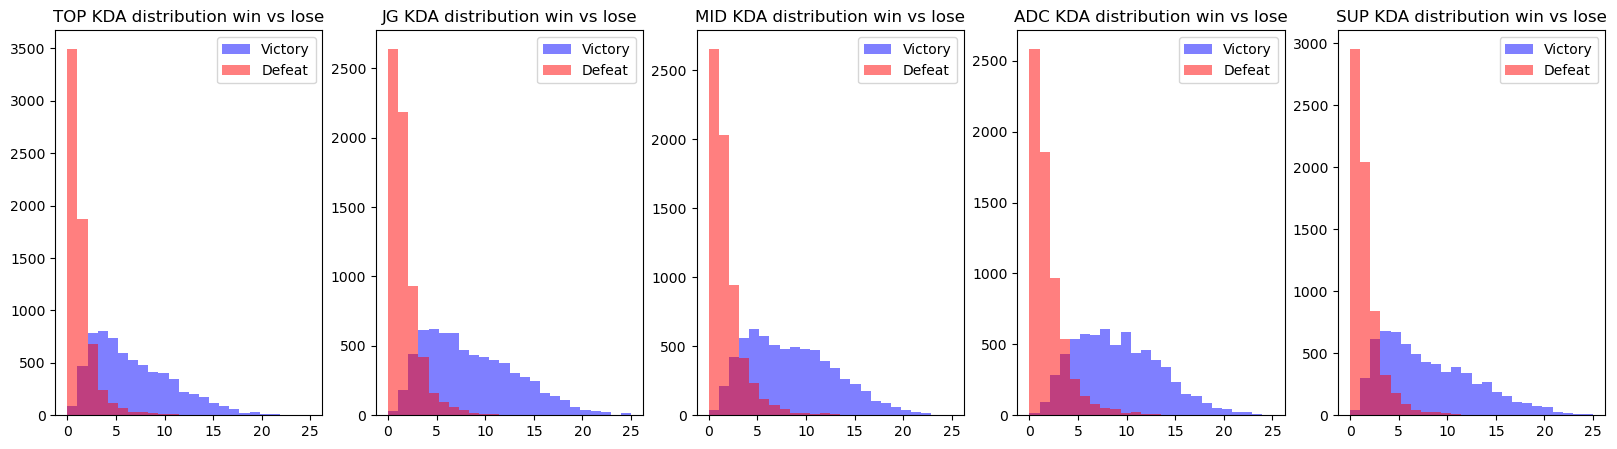

In [24]:
# influence du KDA sur le resultat de la partie

bins = np.linspace(0, 25, 25)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

# Toplaner

topdf = df[df['Role'] == 'TOP']
ax[0].set_title('TOP KDA distribution win vs lose')
ax[0].hist(topdf[topdf['Victory'] == True]['KDA'], bins, alpha=0.5, label='Victory', color='blue')
ax[0].hist(topdf[topdf['Victory'] == False]['KDA'], bins, alpha=0.5, label='Defeat', color='red')
ax[0].legend()

# Jungler

junglerdf = df[df['Role'] == 'JUNGLE']
ax[1].set_title('JG KDA distribution win vs lose')
ax[1].hist(junglerdf[junglerdf['Victory'] == True]['KDA'], bins, alpha=0.5, label='Victory', color='blue')
ax[1].hist(junglerdf[junglerdf['Victory'] == False]['KDA'], bins, alpha=0.5, label='Defeat', color='red')
ax[1].legend()

# Midlane

middf = df[df['Role'] == 'MID']
ax[2].set_title('MID KDA distribution win vs lose')
ax[2].hist(middf[middf['Victory'] == True]['KDA'], bins, alpha=0.5, label='Victory', color='blue')
ax[2].hist(middf[middf['Victory'] == False]['KDA'], bins, alpha=0.5, label='Defeat', color='red')
ax[2].legend()

# ADC guma is the goat

adcdf = df[df['Role'] == 'ADC']
ax[3].set_title('ADC KDA distribution win vs lose')
ax[3].hist(adcdf[adcdf['Victory'] == True]['KDA'], bins, alpha=0.5, label='Victory', color='blue')
ax[3].hist(adcdf[adcdf['Victory'] == False]['KDA'], bins, alpha=0.5, label='Defeat', color='red')
ax[3].legend()

# Support

supportdf = df[df['Role'] == 'SUPPORT']
ax[4].set_title('SUP KDA distribution win vs lose')
ax[4].hist(supportdf[supportdf['Victory'] == True]['KDA'], bins, alpha=0.5, label='Victory', color='blue')
ax[4].hist(supportdf[supportdf['Victory'] == False]['KDA'], bins, alpha=0.5, label='Defeat', color='red')
ax[4].legend()


Statistique plutôt évidente, car dans le contexte du jeu, quand une équipe est sur le point de gagner, ils ont tendance à tuer l'adversaire.

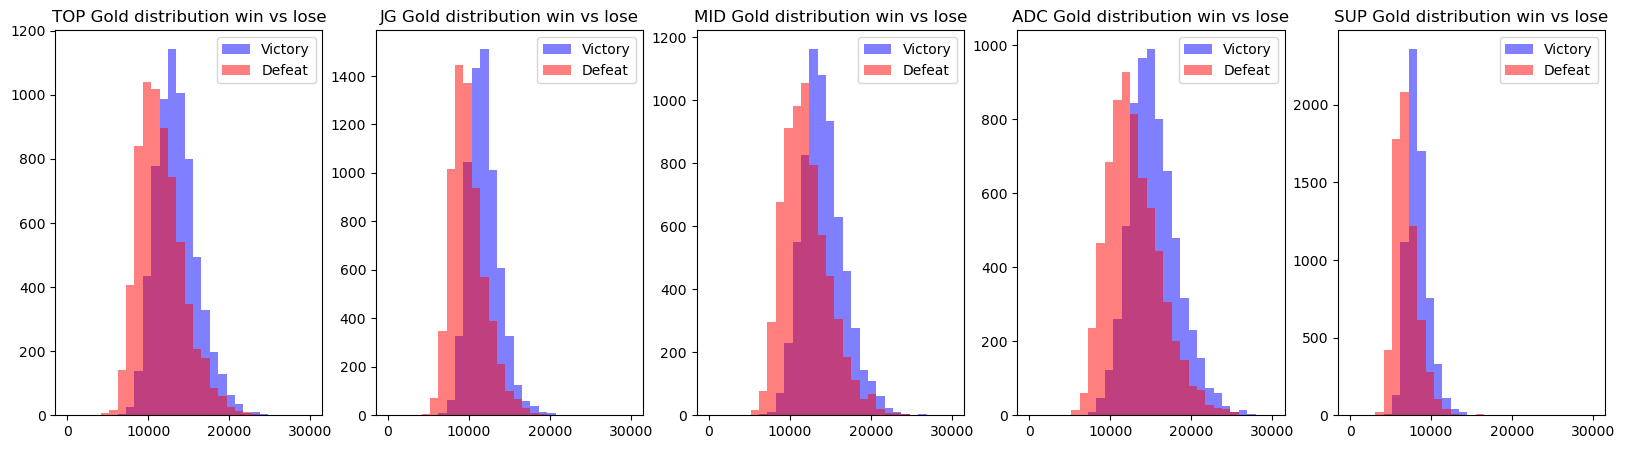

In [25]:
# Influence du gold sur le resultat de la partie

bins = np.linspace(0, 30000, 30)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

# Toplaner

ax[0].set_title('TOP Gold distribution win vs lose')
ax[0].hist(topdf[topdf['Victory'] == True]['Golds'], bins, alpha=0.5, label='Victory', color='blue')
ax[0].hist(topdf[topdf['Victory'] == False]['Golds'], bins, alpha=0.5, label='Defeat', color='red')
ax[0].legend()

# Jungler

ax[1].set_title('JG Gold distribution win vs lose')
ax[1].hist(junglerdf[junglerdf['Victory'] == True]['Golds'], bins, alpha=0.5, label='Victory', color='blue')
ax[1].hist(junglerdf[junglerdf['Victory'] == False]['Golds'], bins, alpha=0.5, label='Defeat', color='red')
ax[1].legend()

# Midlane

ax[2].set_title('MID Gold distribution win vs lose')
ax[2].hist(middf[middf['Victory'] == True]['Golds'], bins, alpha=0.5, label='Victory', color='blue')
ax[2].hist(middf[middf['Victory'] == False]['Golds'], bins, alpha=0.5, label='Defeat', color='red')
ax[2].legend()

# ADC

ax[3].set_title('ADC Gold distribution win vs lose')
ax[3].hist(adcdf[adcdf['Victory'] == True]['Golds'], bins, alpha=0.5, label='Victory', color='blue')
ax[3].hist(adcdf[adcdf['Victory'] == False]['Golds'], bins, alpha=0.5, label='Defeat', color='red')
ax[3].legend()

# Support

ax[4].set_title('SUP Gold distribution win vs lose')
ax[4].hist(supportdf[supportdf['Victory'] == True]['Golds'], bins, alpha=0.5, label='Victory', color='blue')
ax[4].hist(supportdf[supportdf['Victory'] == False]['Golds'], bins, alpha=0.5, label='Defeat', color='red')
ax[4].legend()

plt.show()


Anova à faire

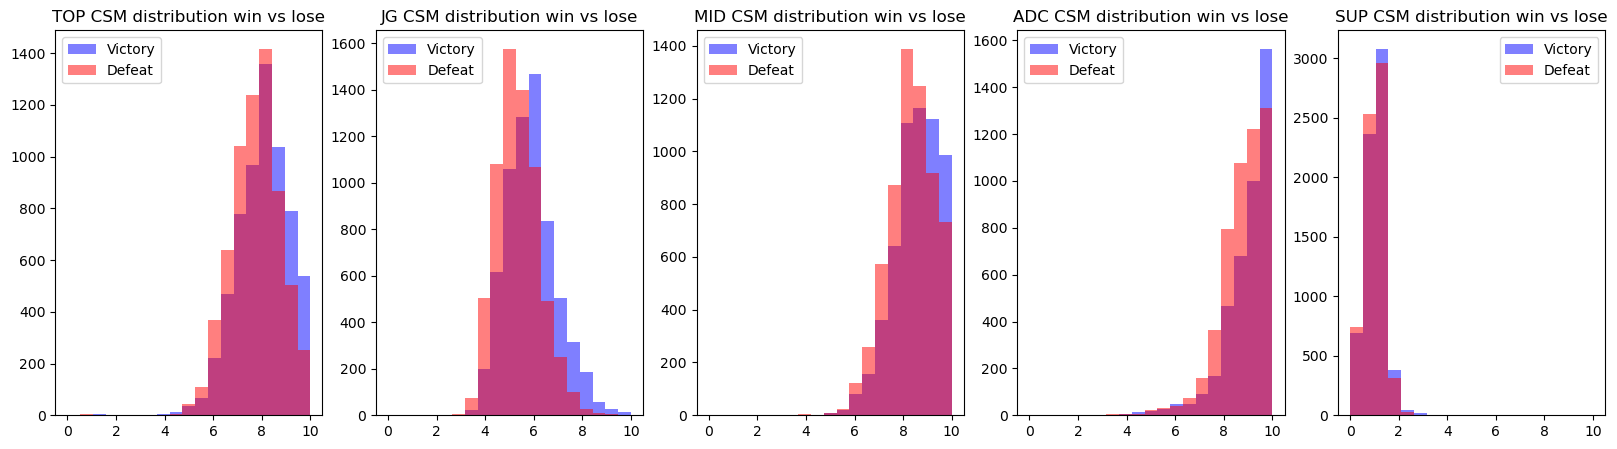

In [26]:
# CSM distribution for each role (win vs lose)

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
bins = np.linspace(0, 10, 20)

# Toplaner

ax[0].set_title('TOP CSM distribution win vs lose')
ax[0].hist(topdf[topdf['Victory'] == True]['CSM'], bins, alpha=0.5, label='Victory', color='blue')
ax[0].hist(topdf[topdf['Victory'] == False]['CSM'], bins, alpha=0.5, label='Defeat', color='red')
ax[0].legend()

# Jungler

ax[1].set_title('JG CSM distribution win vs lose')
ax[1].hist(junglerdf[junglerdf['Victory'] == True]['CSM'], bins, alpha=0.5, label='Victory', color='blue')
ax[1].hist(junglerdf[junglerdf['Victory'] == False]['CSM'], bins, alpha=0.5, label='Defeat', color='red')
ax[1].legend()

# Midlane

ax[2].set_title('MID CSM distribution win vs lose')
ax[2].hist(middf[middf['Victory'] == True]['CSM'], bins, alpha=0.5, label='Victory', color='blue')
ax[2].hist(middf[middf['Victory'] == False]['CSM'], bins, alpha=0.5, label='Defeat', color='red')
ax[2].legend()

# ADC

ax[3].set_title('ADC CSM distribution win vs lose')
ax[3].hist(adcdf[adcdf['Victory'] == True]['CSM'], bins, alpha=0.5, label='Victory', color='blue')
ax[3].hist(adcdf[adcdf['Victory'] == False]['CSM'], bins, alpha=0.5, label='Defeat', color='red')
ax[3].legend()

# Support

ax[4].set_title('SUP CSM distribution win vs lose')
ax[4].hist(supportdf[supportdf['Victory'] == True]['CSM'], bins, alpha=0.5, label='Victory', color='blue')
ax[4].hist(supportdf[supportdf['Victory'] == False]['CSM'], bins, alpha=0.5, label='Defeat', color='red')
ax[4].legend()

plt.show()

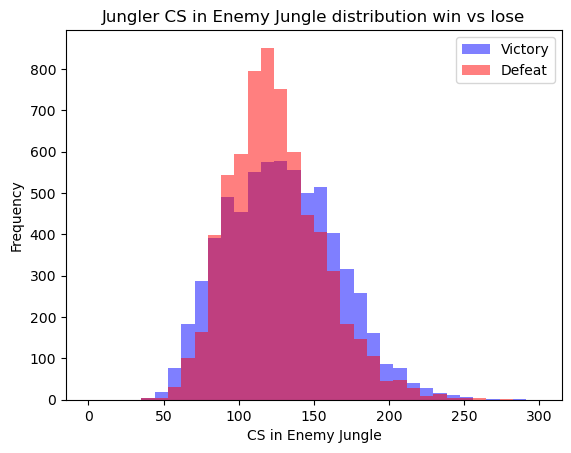

In [27]:
# Jungler CS in Team's Jungle,CSM distribution (win vs lose)

bins = np.linspace(0, 300, 35)
plt.hist(junglerdf[junglerdf['Victory'] == True]["CS in Team's Jungle"], bins, alpha=0.5, label='Victory', color='blue')
plt.hist(junglerdf[junglerdf['Victory'] == False]["CS in Team's Jungle"], bins, alpha=0.5, label='Defeat', color='red')
plt.legend()

plt.xlabel('CS in Enemy Jungle')
plt.ylabel('Frequency')

plt.title('Jungler CS in Enemy Jungle distribution win vs lose')

plt.show()

In [28]:
# Trying to visualize if winning lane is important for winning the game.
# Let's say having more CS than the opponent @15 is winning lane, in the real game it's not that simple as ganks, roams, objectives, etc. are important too.

# Top
top_win = topdf[topdf['Victory'] == True]
print(f"Top win rate when winning lane: {len(top_win[top_win['CSD@15'] >= 0]) / len(top_win) * 100}%")

# Jungle

jungle_win = junglerdf[junglerdf['Victory'] == True]
print(f"Jungle win rate when winning lane: {len(jungle_win[jungle_win['CSD@15'] >= 0]) / len(jungle_win) * 100}%")

# Mid

mid_win = middf[middf['Victory'] == True]
print(f"Mid win rate when winning lane: {len(mid_win[mid_win['CSD@15'] >= 0]) / len(mid_win) * 100}%")

# ADC

adc_win = adcdf[adcdf['Victory'] == True]
print(f"ADC win rate when winning lane: {len(adc_win[adc_win['CSD@15'] >= 0]) / len(adc_win) * 100}%")

# Support

support_win = supportdf[supportdf['Victory'] == True]
print(f"Support win rate when winning lane: {len(support_win[support_win['CSD@15'] >= 0]) / len(support_win) * 100}%")

Top win rate when winning lane: 56.622114216281894%
Jungle win rate when winning lane: 57.29040097205347%
Mid win rate when winning lane: 58.034629404617256%
ADC win rate when winning lane: 60.82928311057108%
Support win rate when winning lane: 54.222357229647635%


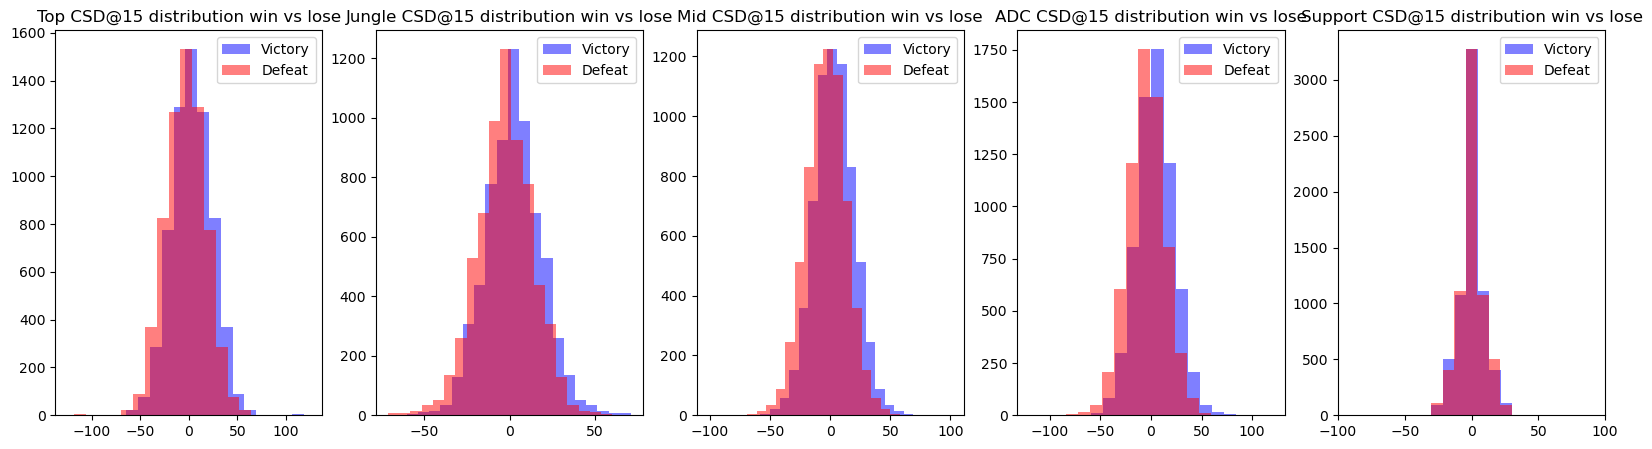

In [29]:
# Plot the CSD@15 distribution for each role (win vs lose)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Top

axes[0].set_title('Top CSD@15 distribution win vs lose')
axes[0].hist(topdf[topdf['Victory'] == True]['CSD@15'], bins=20, alpha=0.5, label='Victory', color='blue')
axes[0].hist(topdf[topdf['Victory'] == False]['CSD@15'], bins=20, alpha=0.5, label='Defeat', color='red')
axes[0].legend()

# Jungle

axes[1].set_title('Jungle CSD@15 distribution win vs lose')
axes[1].hist(junglerdf[junglerdf['Victory'] == True]['CSD@15'], bins=20, alpha=0.5, label='Victory', color='blue')
axes[1].hist(junglerdf[junglerdf['Victory'] == False]['CSD@15'], bins=20, alpha=0.5, label='Defeat', color='red')
axes[1].legend()

# Mid

axes[2].set_title('Mid CSD@15 distribution win vs lose')
axes[2].hist(middf[middf['Victory'] == True]['CSD@15'], bins=20, alpha=0.5, label='Victory', color='blue')
axes[2].hist(middf[middf['Victory'] == False]['CSD@15'], bins=20, alpha=0.5, label='Defeat', color='red')
axes[2].legend()

# ADC

axes[3].set_title('ADC CSD@15 distribution win vs lose')
axes[3].hist(adcdf[adcdf['Victory'] == True]['CSD@15'], bins=20, alpha=0.5, label='Victory', color='blue')
axes[3].hist(adcdf[adcdf['Victory'] == False]['CSD@15'], bins=20, alpha=0.5, label='Defeat', color='red')
axes[3].legend()

# Support

axes[4].set_title('Support CSD@15 distribution win vs lose')
axes[4].hist(supportdf[supportdf['Victory'] == True]['CSD@15'], bins=20, alpha=0.5, label='Victory', color='blue')
axes[4].hist(supportdf[supportdf['Victory'] == False]['CSD@15'], bins=20, alpha=0.5, label='Defeat', color='red')
axes[4].legend()



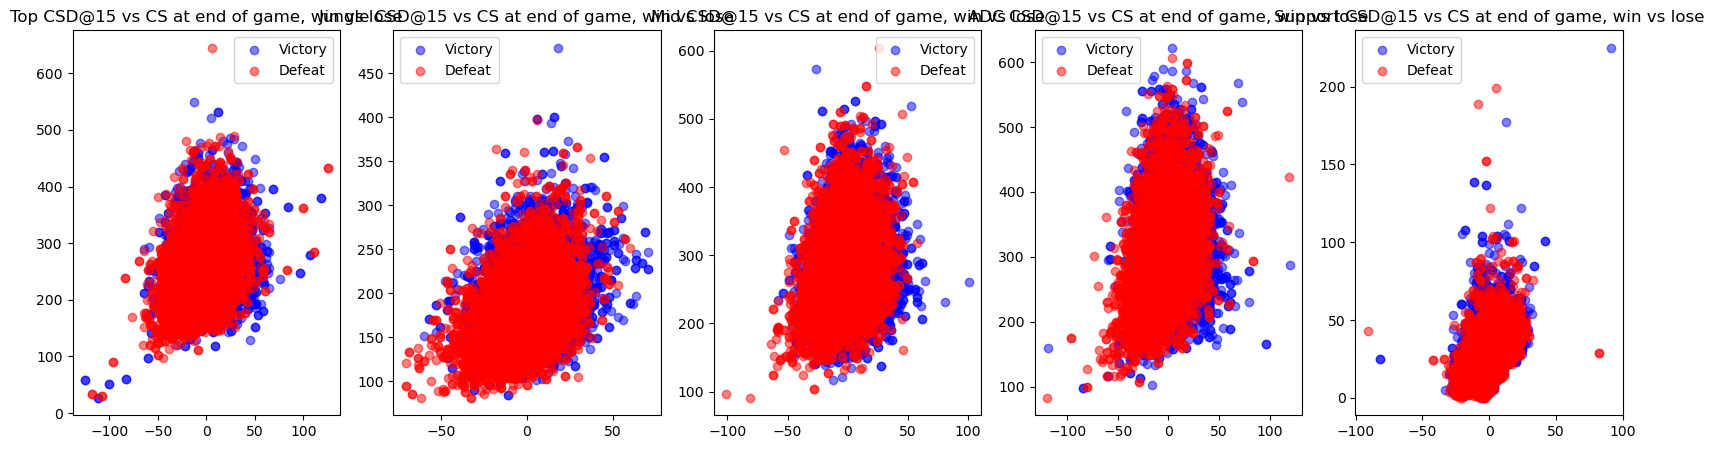

In [30]:
# Influence of CSD@15 on CS at the end of the game for winning and losing lanes

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Top

axes[0].set_title('Top CSD@15 vs CS at end of game, win vs lose')
axes[0].scatter(topdf[topdf['Victory'] == True]['CSD@15'], topdf[topdf['Victory'] == True]['CS'], color='blue', alpha=0.5, label='Victory')
axes[0].scatter(topdf[topdf['Victory'] == False]['CSD@15'], topdf[topdf['Victory'] == False]['CS'], color='red', alpha=0.5, label='Defeat')
axes[0].legend()

# Jungle

axes[1].set_title('Jungle CSD@15 vs CS at end of game, win vs lose')
axes[1].scatter(junglerdf[junglerdf['Victory'] == True]['CSD@15'], junglerdf[junglerdf['Victory'] == True]['CS'], color='blue', alpha=0.5, label='Victory')
axes[1].scatter(junglerdf[junglerdf['Victory'] == False]['CSD@15'], junglerdf[junglerdf['Victory'] == False]['CS'], color='red', alpha=0.5, label='Defeat')
axes[1].legend()

# Mid

axes[2].set_title('Mid CSD@15 vs CS at end of game, win vs lose')
axes[2].scatter(middf[middf['Victory'] == True]['CSD@15'], middf[middf['Victory'] == True]['CS'], color='blue', alpha=0.5, label='Victory')
axes[2].scatter(middf[middf['Victory'] == False]['CSD@15'], middf[middf['Victory'] == False]['CS'], color='red', alpha=0.5, label='Defeat')
axes[2].legend()

# ADC

axes[3].set_title('ADC CSD@15 vs CS at end of game, win vs lose')
axes[3].scatter(adcdf[adcdf['Victory'] == True]['CSD@15'], adcdf[adcdf['Victory'] == True]['CS'], color='blue', alpha=0.5, label='Victory')
axes[3].scatter(adcdf[adcdf['Victory'] == False]['CSD@15'], adcdf[adcdf['Victory'] == False]['CS'], color='red', alpha=0.5, label='Defeat')
axes[3].legend()

# Support

axes[4].set_title('Support CSD@15 vs CS at end of game, win vs lose')
axes[4].scatter(supportdf[supportdf['Victory'] == True]['CSD@15'], supportdf[supportdf['Victory'] == True]['CS'], color='blue', alpha=0.5, label='Victory')
axes[4].scatter(supportdf[supportdf['Victory'] == False]['CSD@15'], supportdf[supportdf['Victory'] == False]['CS'], color='red', alpha=0.5, label='Defeat')
axes[4].legend()

plt.show()

In [31]:
# Analyzing the influence of kills for AD Carry role on the outcome of the game

# ADC

# Winrate when ADC has more kills than the opponent ADC

adc_win = adcdf[adcdf['Victory'] == True]
adc_loss = adcdf[adcdf['Victory'] == False]

wins = 0
for row in adc_win.iterrows():
    if row[1]['Kills'] > adc_loss[adc_loss['Game ID'] == row[1]['Game ID']].iloc[0]['Kills']:
        wins += 1

print(f"ADC win rate when having more kills than the opponent ADC: {wins / len(adc_win) * 100}%")

# For Top

top_win = topdf[topdf['Victory'] == True]
top_loss = topdf[topdf['Victory'] == False]

wins = 0
for row in top_win.iterrows():
    if row[1]['Kills'] > top_loss[top_loss['Game ID'] == row[1]['Game ID']].iloc[0]['Kills']:
        wins += 1

print(f"Top win rate when having more kills than the opponent Top: {wins / len(top_win) * 100}%")

# For Mid

mid_win = middf[middf['Victory'] == True]
mid_loss = middf[middf['Victory'] == False]

wins = 0
for row in mid_win.iterrows():
    if row[1]['Kills'] > mid_loss[mid_loss['Game ID'] == row[1]['Game ID']].iloc[0]['Kills']:
        wins += 1

print(f"Mid win rate when having more kills than the opponent Mid: {wins / len(mid_win) * 100}%")

# For Jungle

jungle_win = junglerdf[junglerdf['Victory'] == True]
jungle_loss = junglerdf[junglerdf['Victory'] == False]

wins = 0
for row in jungle_win.iterrows():
    if row[1]['Kills'] > jungle_loss[jungle_loss['Game ID'] == row[1]['Game ID']].iloc[0]['Kills']:
        wins += 1

print(f"Jungle win rate when having more kills than the opponent Jungle: {wins / len(jungle_win) * 100}%")

# For Support

support_win = supportdf[supportdf['Victory'] == True]
support_loss = supportdf[supportdf['Victory'] == False]

wins = 0
for row in support_win.iterrows():
    if row[1]['Kills'] > support_loss[support_loss['Game ID'] == row[1]['Game ID']].iloc[0]['Kills']:
        wins += 1

print(f"Support win rate when having more kills than the opponent Support: {wins / len(support_win) * 100}%")

ADC win rate when having more kills than the opponent ADC: 80.51336573511543%
Top win rate when having more kills than the opponent Top: 68.955042527339%
Mid win rate when having more kills than the opponent Mid: 73.5419198055893%
Jungle win rate when having more kills than the opponent Jungle: 66.13001215066828%
Support win rate when having more kills than the opponent Support: 43.22600243013366%


Support win rate when having more vision score than the opponent Support: 64.59599027946537%


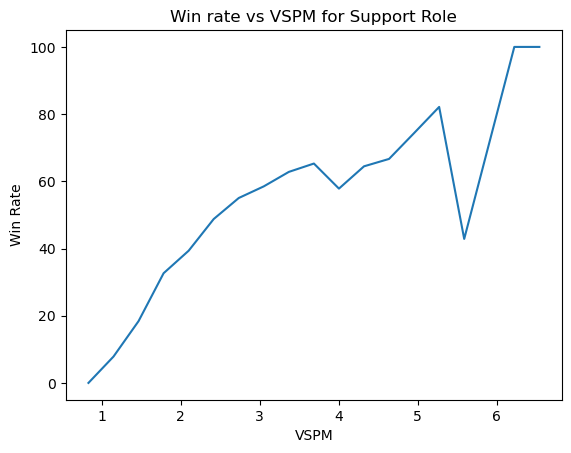

In [32]:
# Does higher vision score for support role lead to more wins?

support_win = supportdf[supportdf['Victory'] == True]
support_loss = supportdf[supportdf['Victory'] == False]

wins = 0
for row in support_win.iterrows():
    if row[1]['Vision Score'] > support_loss[support_loss['Game ID'] == row[1]['Game ID']].iloc[0]['Vision Score']:
        wins += 1

print(f"Support win rate when having more vision score than the opponent Support: {wins / len(support_win) * 100}%")

# Win rate for VSPM for support role

bins = np.linspace(supportdf['VSPM'].min(), supportdf['VSPM'].max(), 20)
bin_wins = [0] * (len(bins) - 1)
bin_losses = [0] * (len(bins) - 1)

for row in supportdf.iterrows():
    if row[1]['Victory']:
        for i in range(len(bins) - 1):
            if bins[i] <= row[1]['VSPM'] < bins[i + 1]:
                bin_wins[i] += 1
                break
    else:
        for i in range(len(bins) - 1):
            if bins[i] <= row[1]['VSPM'] < bins[i + 1]:
                bin_losses[i] += 1
                break

bin_wr = [bin_wins[i] / (bin_wins[i] + bin_losses[i]) * 100 for i in range(len(bin_wins))]
plt.plot(bins[:-1], bin_wr)
plt.title('Win rate vs VSPM for Support Role')
plt.xlabel('VSPM')
plt.ylabel('Win Rate')

plt.show()

In [33]:
# Would better support vision and a dominant AD in lane lead to more wins?
# IE a higher VSPM for support and higher CSD@15 for ADC

# For the same Game ID

games = 0
wins = 0

# for each unique "Game ID" in df
for game_id in df['Game ID'].unique():
    # get the row of the game_id
    game = df[df['Game ID'] == game_id]
    gameblue = game[game['Side'] == 'Blue Side']
    gamered = game[game['Side'] == 'Red Side']

    # Redside
    if gamered[gamered['Role'] == 'SUPPORT']['VSPM'].values[0] > gameblue[gameblue['Role'] == 'SUPPORT']['VSPM'].values[0] and gamered[gamered['Role'] == 'ADC']['CSD@15'].values[0] > gameblue[gameblue['Role'] == 'ADC']['CSD@15'].values[0]:
        games += 1
        if gamered['Victory'].values[0]:
            wins += 1
    
    # Blueside
    if gameblue[gameblue['Role'] == 'SUPPORT']['VSPM'].values[0] > gamered[gamered['Role'] == 'SUPPORT']['VSPM'].values[0] and gameblue[gameblue['Role'] == 'ADC']['CSD@15'].values[0] > gamered[gamered['Role'] == 'ADC']['CSD@15'].values[0]:
        games += 1
        if gameblue['Victory'].values[0]:
            wins += 1

if games == 0:
    print("No games found with higher VSPM for support and higher CSD@15 for ADC")
else:
    print(f"Win rate when support has higher VSPM and ADC has higher CSD@15: {wins / games * 100}%")

Win rate when support has higher VSPM and ADC has higher CSD@15: 72.85541683447443%


When support has higher VSPM and ADC has higher CSD@15, IE when the support gives more vision to the team and that the ADC has potentially more ressources after the laning phase.

The winrate is actually at 72%

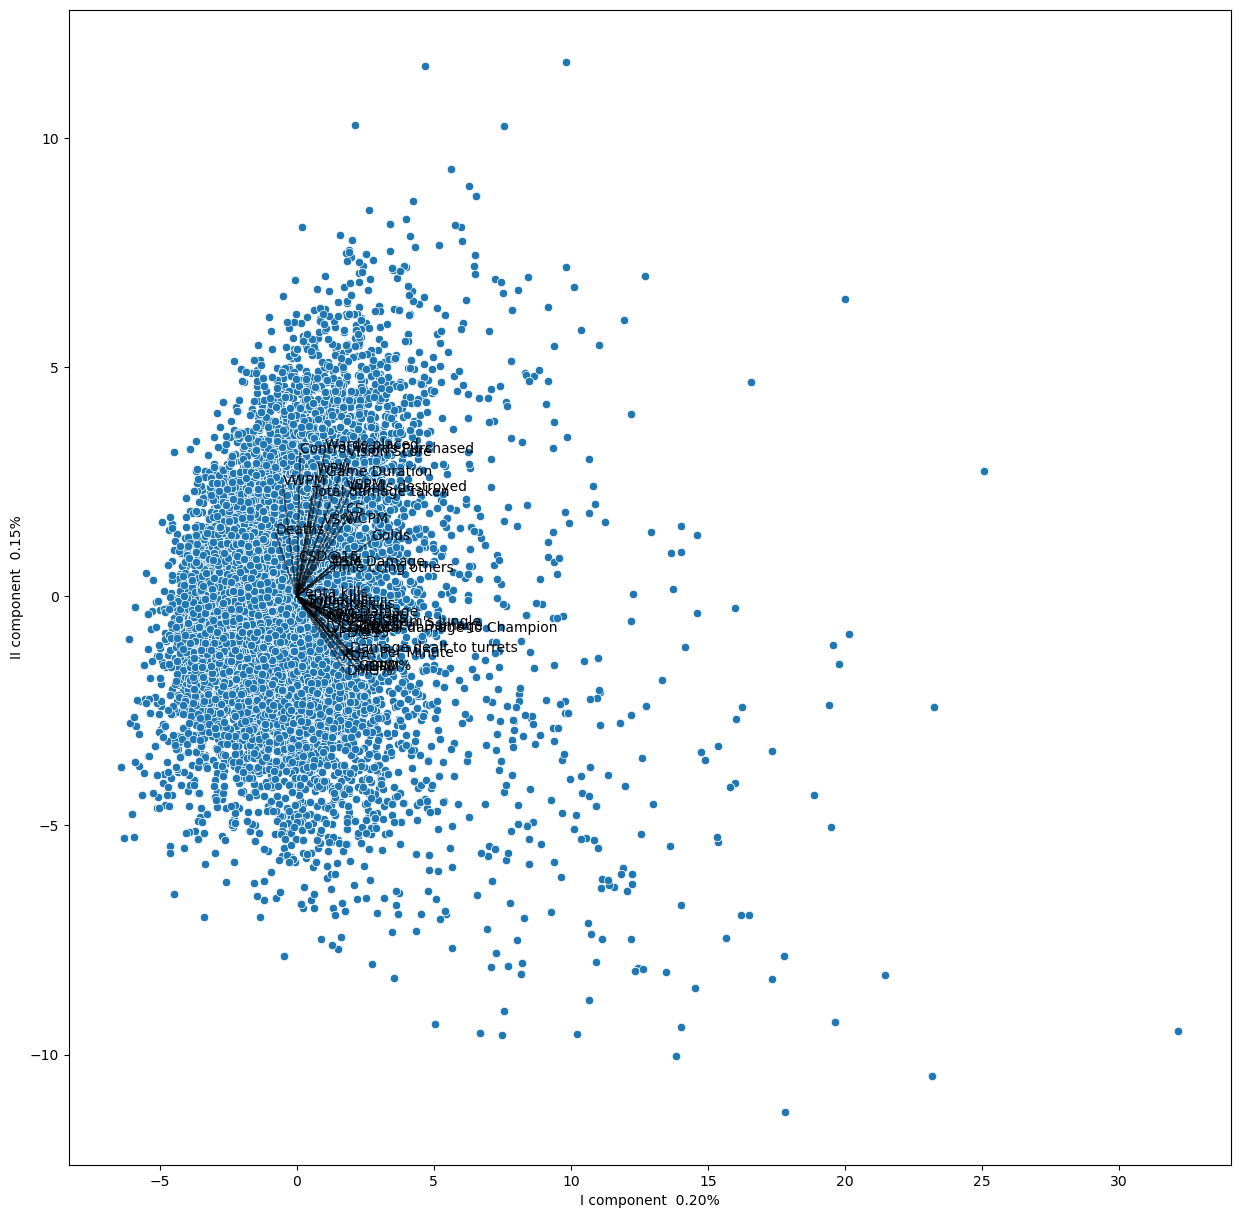

In [34]:
analyze_tools.pca_components(roledf.dropna(axis=1), n_components=5)

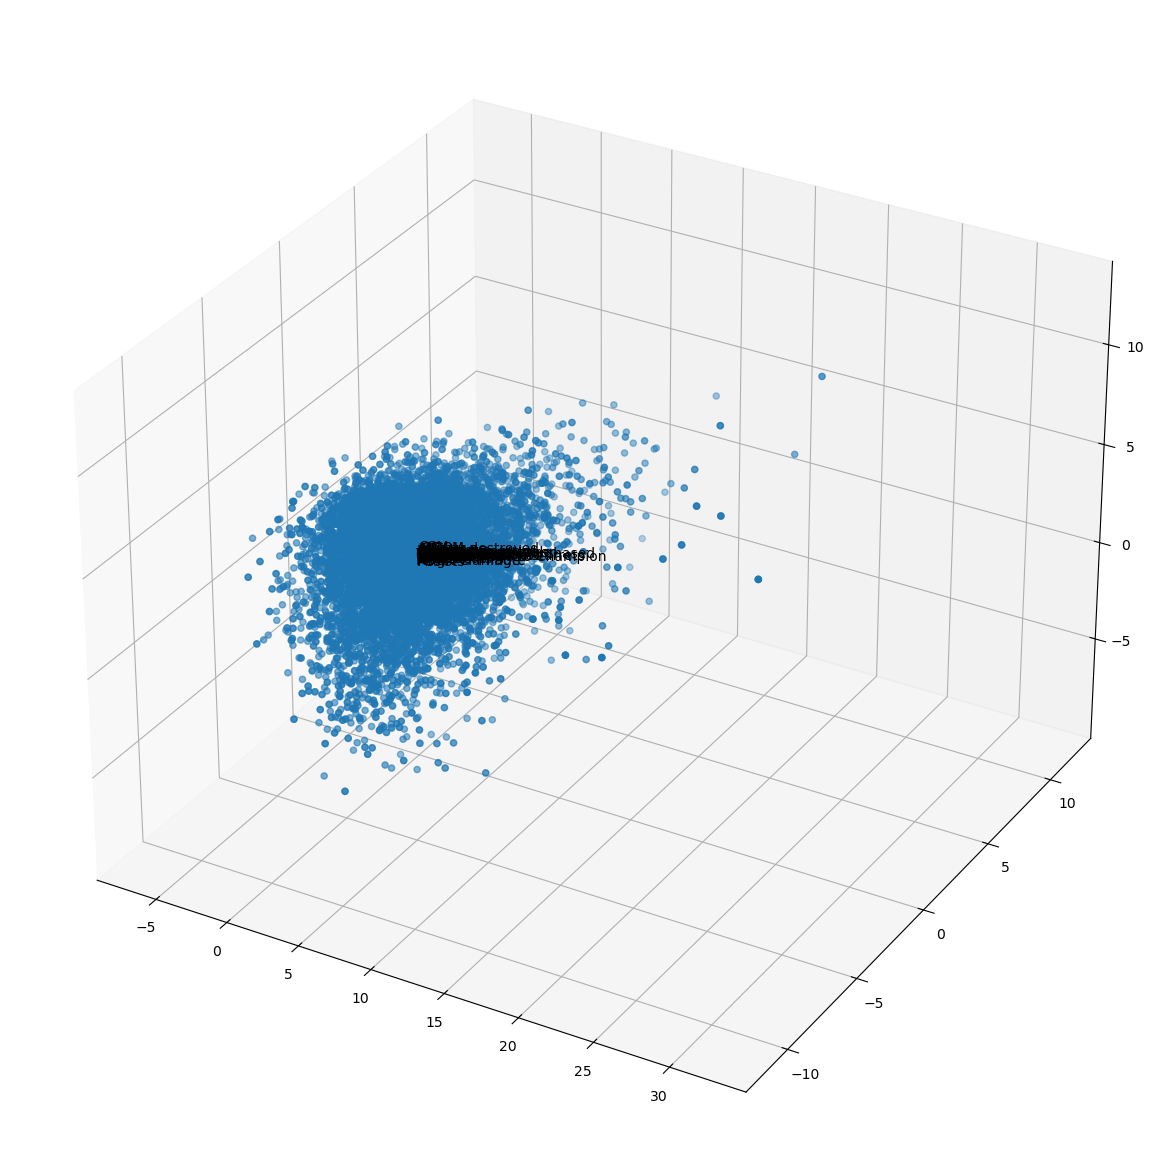

In [35]:
analyze_tools.pca_components3d(roledf.dropna(axis=1))

In [36]:
import math

from sklearn.cluster import KMeans


tab20 = plt.get_cmap('tab20')

def plot_kmeans(algo_data, n_clusters=8):
    km = KMeans(n_clusters)
    pred = km.fit_predict(algo_data)
    plt.scatter(algo_data[:,0],algo_data[:,1],color = [tab20.colors[pred[i]] for i in range(len(pca_data))],s=5)

def plot_kmeans_pca(data, algo_data, algo, n_clusters=8):
    km = KMeans(n_clusters)
    pred = km.fit_predict(algo_data)
    plt.scatter(algo_data[:,0],algo_data[:,1],color = [tab20.colors[pred[i]] for i in range(len(pca_data))],s=5)
    real_centers = np.exp(algo.inverse_transform(km.cluster_centers_))
    fig, axs = plt.subplots(math.floor(km.n_clusters/2) + 1, 2, figsize=(12, 8), sharey=True,sharex=True)
    for i,k in enumerate(real_centers):
        axs.flatten()[i].bar(range(len(k)),k,color=tab20.colors[i])
        axs.flatten()[i].set_xticks(range(len(k)))
        axs.flatten()[i].set_xticklabels(data.columns,rotation="vertical")

/opt/miniconda3/envs/dac/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


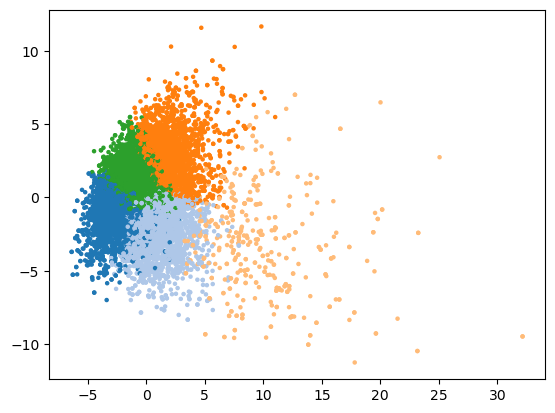

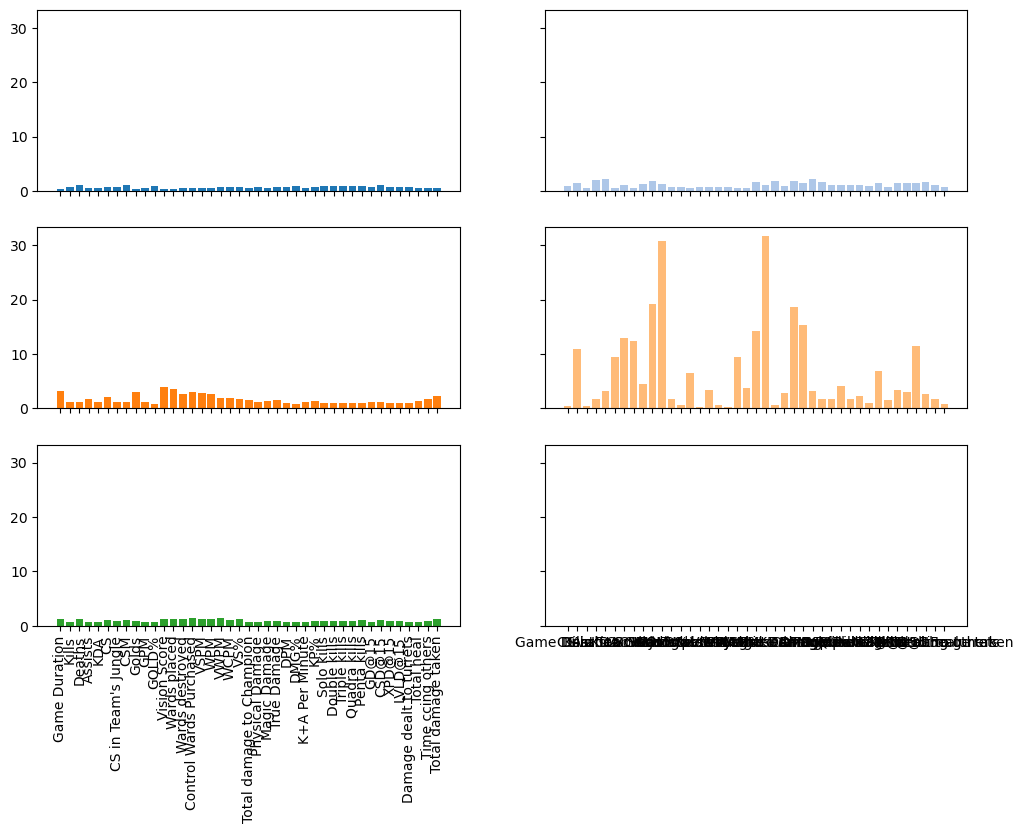

In [37]:
# Kmeans clustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

tab20 = plt.get_cmap('tab20')
pca = PCA(n_components=3)

data = roledf.dropna(axis=1)

scaler = StandardScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
pca_data = pca.fit_transform(norm_data)

plot_kmeans_pca(data, pca_data, pca, n_clusters=5)